In [ ]:
# %pip install numpy matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Reading, displaying, and cropping images

**Learning goals**
1. How to read images and see its dimensions and shape
2. Plotting with cmap, vmin, vmax
3. Displaying only part of an image

**Example** Read `img/image_1.png` and display its shape, number of dimensions, and dtype

In [2]:
image = plt.imread('img/image_1.png')
image.shape, image.ndim, image.dtype

((3, 3), 2, dtype('float32'))

Read `img/image_2.png` and display its shape, number of dimensions, and dtype

In [3]:
image = plt.imread('img/image_2.png')
image.shape, image.ndim, image.dtype

((3, 3), 2, dtype('float32'))

Read `img/image_4.png` and display its shape, number of dimensions, and dtype. How is it different from `image_2.png`. What does it signify?

In [4]:
image = plt.imread('img/image_4.jpg')
image.shape, image.ndim, image.dtype

((3, 3, 3), 3, dtype('uint8'))

`image_4` has three dimensions. It is 3x3 pixels image. Additionally, it also has three channels (Red-R, Green-G, Blue-B). image_2 is 3x3 pixels image and has only one channel. Multiple channels are used in creation of composite images. We will learn more about this in next section. Now let's learn how to display images.

**Example** Read and display `img/image_1.png`

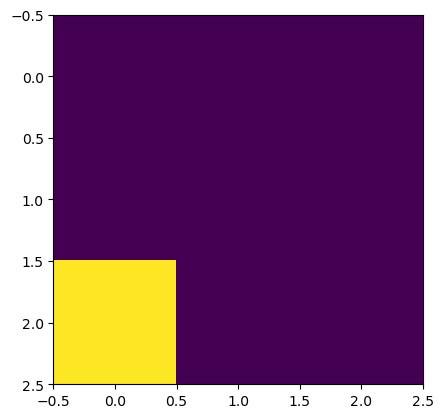

In [5]:
image = plt.imread('img/image_1.png')
plt.imshow(image)

`image_2.png` has an active pixel in same location as image_1.png. However, the intensity is lesser. Can you see the difference in intensity just by looking at the plot?

Read and display `img/image_2.png`

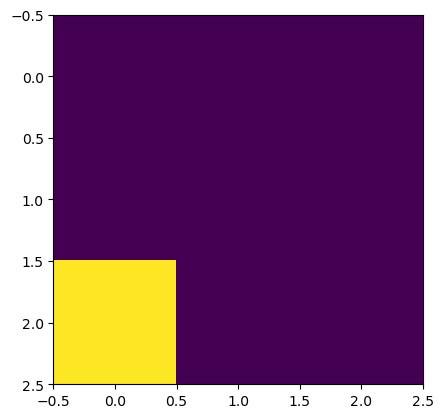

In [6]:
image = plt.imread('img/image_2.png')
plt.imshow(image)

Nope! 

Read and display `img/image_1.png` with a colorbar. What are the minimum and maximum values by looking at the colorbar?

Hint: Use `plt.colorbar();`

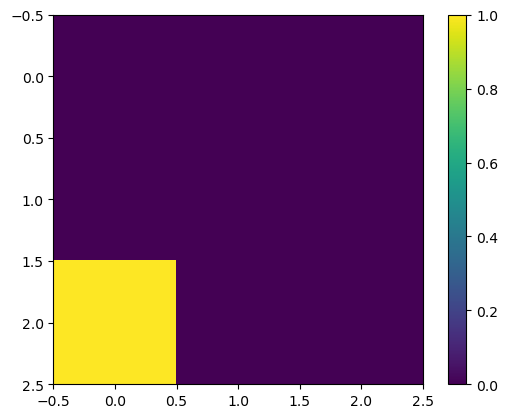

In [7]:
image = plt.imread('img/image_1.png')
plt.imshow(image)
plt.colorbar();

Read and display `img/image_2.png` with a colorbar. What are the minimum and maximum values by looking at the colorbar? 
Now do you see the difference between the two images?

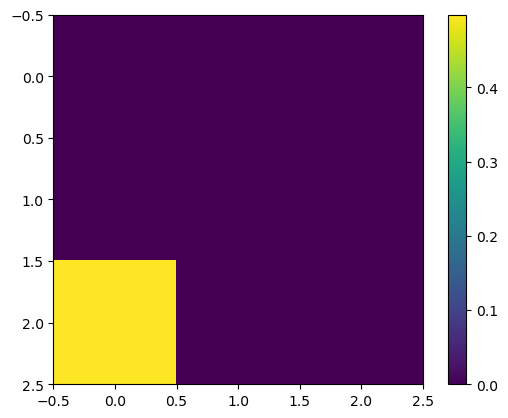

In [8]:
image = plt.imread('img/image_2.png')
plt.imshow(image)
plt.colorbar();

You can specify lower and upper bounds of colorbar by setting `vmin` and `vmax`. This can help with comparison

Read and display `img/image_2.png` with a colorbar and set vmin to 0 and vmax to 1.

Hint: plt.imshow(image, vmin=value_vmin, vmax=value_vmax)

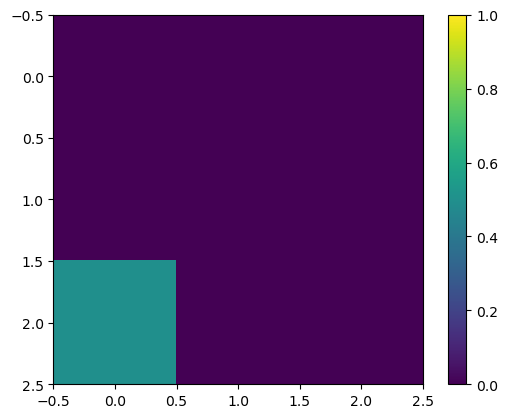

In [9]:
image = plt.imread('img/image_2.png')
plt.imshow(image, vmin=0, vmax=1)
plt.colorbar();

Let's look at multi-channel images.
 
How does image_3.png look like with a colorbar? Do you see something odd?

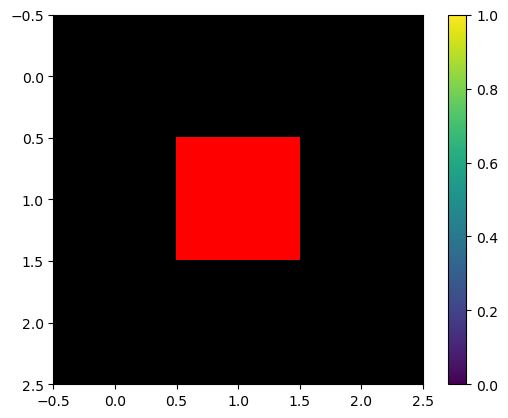

In [10]:
image = plt.imread('img/image_3.png')
plt.imshow(image)
plt.colorbar();

Try changing colormap to gray by setting cmap='gray' in plt.imshow(). Does this help?

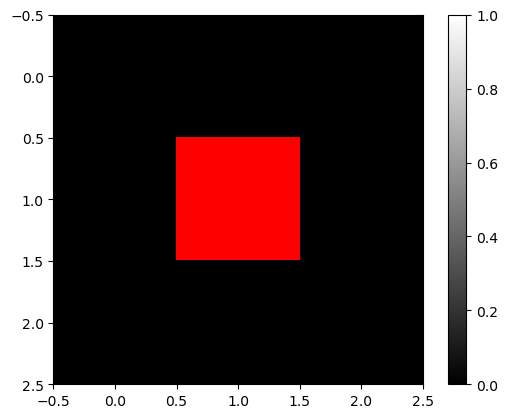

In [11]:
image = plt.imread('img/image_3.png')
plt.imshow(image, cmap='gray')
plt.colorbar();

When you load an image using `plt.imread` and then display it with `plt.imshow`, specifying `cmap='gray'` should display the image in grayscale, regardless of the image format (PNG, JPG, etc.). However, if the image naturally contains color information (e.g., RGB channels), Matplotlib will display the image in color if you do not explicitly convert it to grayscale.

**Example** Convert image to grayscale by taking mean across all channels and display grayscale image with colorbar. 

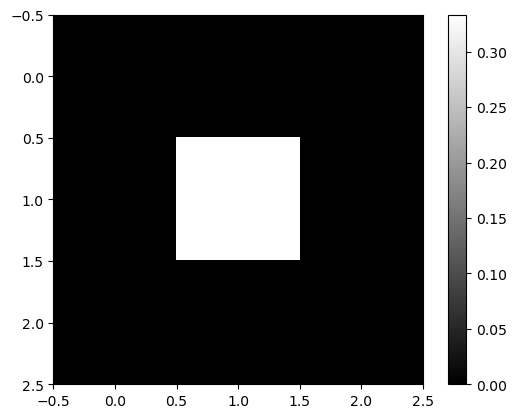

In [12]:
image = plt.imread('img/image_3.png')
grayscale_image = np.mean(image, axis=2) # converting to grayscale by taking mean across all channels
plt.imshow(grayscale_image, cmap='gray')
plt.colorbar();

Convert image to grayscale by taking maximum across all channels and display grayscale image with colorbar. 

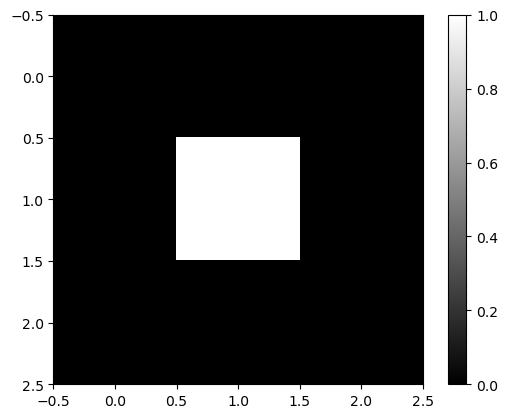

In [13]:
image = plt.imread('img/image_3.png')
grayscale_image = np.max(image, axis=2)
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=1)
plt.colorbar();

## Separating channels

**Learning goals**
1. Grayscale and RGB image difference
2. Separating channels and visualizing them

In [ ]:
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]
plt.imshow(red_channel, cmap='Reds')
plt.show()
plt.imshow(green_channel, cmap='Greens')
plt.show()
plt.imshow(blue_channel, cmap='Blues')
plt.show()

In [ ]:
swapped_image = image[:, :, [1, 0, 2]]  # Swap red and green
plt.imshow(swapped_image)
plt.show()

In [ ]:
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.5)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.5)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.5)
plt.show()

## Cropping and Filtering images

**Learning goals**
Filtering based on condition to highlight certain regions of image

In [ ]:
image = plt.imread('img/1p_maxproj.png')
cropped_image = image[50:, :]  # Adjust indices as needed
plt.imshow(cropped_image)
plt.colorbar()

In [ ]:
image = plt.imread('img/1p_maxproj.png')
cropped_image = image[50:100, :]  # Adjust indices as needed
plt.imshow(cropped_image)
plt.colorbar()

In [ ]:
image = plt.imread('img/1p_maxproj.png')
cropped_image = image[50:100, 50:100]  # Adjust indices as needed
plt.imshow(cropped_image)
plt.colorbar()

In [ ]:
thresholded = image > 128  # Apply threshold
plt.imshow(thresholded, cmap='gray')
plt.show()

In [ ]:
specific_range = np.logical_and(image > 100, image < 150)
plt.imshow(specific_range, cmap='gray')
plt.show()

In [ ]:
sin_wave = np.sin(np.linspace(-np.pi * 4, np.pi * 4, 200))
sin_matrix = np.tile(sin_wave, (200, 1))
plt.imshow(sin_matrix, cmap='gray');

In [ ]:
frame = np.array(
    [
        [-10, 0, 0],
        [0, 10, 0],
        [0, 0 ,-10]
    ]
)
plt.imshow(frame, cmap='coolwarm')
plt.colorbar();

In [ ]:
significant_activity_vmin = np.percentile(activity_data, 75)  # 75th percentile for top 25%

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Activity Data")
plt.imshow(activity_data, cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Highlighting Top 25% Activity")
plt.imshow(activity_data, cmap='viridis', vmin=significant_activity_vmin, vmax=255)
plt.colorbar()


## Making composite images

1. Make composite images from red and green channel
2. Make composite images from rgb channels

In [ ]:
combined_image = np.stack((red_channel, np.zeros_like(red_channel), blue_channel), axis=2)
plt.imshow(combined_image)
plt.show()

In [ ]:
manual_grayscale = (red_channel + green_channel + blue_channel) / 3
plt.imshow(manual_grayscale, cmap='gray')
plt.show()

In [ ]:
combined_image = np.stack((red_channel, green_channel, blue_channel), axis=2)
plt.imshow(combined_image)
plt.show()

In [ ]:
#normalization